In [1]:
using DataFrames
using Distributions
using PyPlot

In [2]:
df = DataFrame(
id = [1],
localetype=[3],
totalpop=[50000],
demos_1_unexposed = [12500]   ,
demos_1_exposed  = [0]  ,
demos_2_unexposed = [13000],
demos_2_exposed = [0],
demos_3_unexposed = [13000],
demos_3_exposed   =[0] ,
demos_4_unexposed    =  [7500],
demos_4_exposed    = [0],
demos_5_unexposed   = [4000], 
demos_5_exposed    = [0]
)

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [3]:
sum(df[1,4:13])

50000

In [4]:
df

,id,localetype,totalpop,demos_1_unexposed,demos_1_exposed,demos_2_unexposed
,Int64,Int64,Int64,Int64,Int64,Int64
1,1,3,50000,12500,0,13000


In [5]:
foo = Matrix(df)

1×13 Array{Int64,2}:
 1  3  50000  12500  0  13000  0  13000  0  7500  0  4000  0

In [6]:
foo'

13×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
     1
     3
 50000
 12500
     0
 13000
     0
 13000
     0
  7500
     0
  4000
     0

### Figuring out what distribution and paramaters to use; how to apply to events

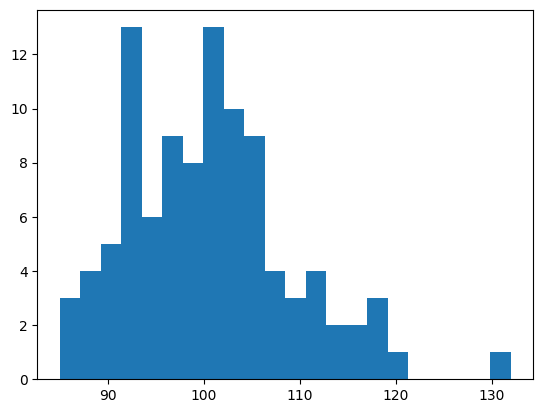

100.59
[3.0, 4.0, 5.0, 13.0, 6.0, 9.0, 8.0, 13.0, 10.0, 9.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[85.0, 87.13636363636364, 89.27272727272727, 91.4090909090909, 93.54545454545455, 95.68181818181819, 97.81818181818181, 99.95454545454545, 102.0909090909091, 104.22727272727272, 106.36363636363636, 108.5, 110.63636363636363, 112.77272727272727, 114.9090909090909, 117.04545454545455, 119.18181818181819, 121.31818181818181, 123.45454545454545, 125.5909090909091, 127.72727272727272, 129.86363636363637, 132.0]


In [26]:
dbin = Binomial(1000,0.1)
x = rand(dbin,100);
println(mean(x))
hh = hist(x,22);
println(hh[1])
println(hh[2])

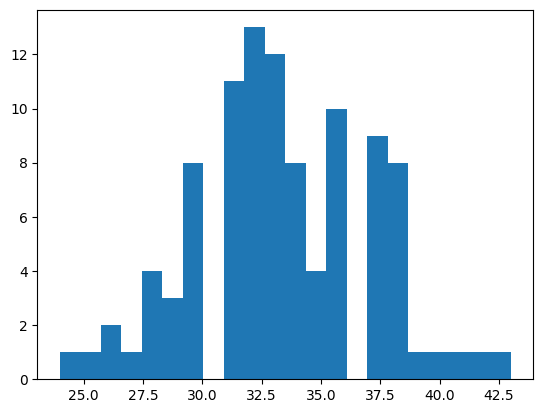

33.34


In [66]:
dhypergeo = Hypergeometric(100,200,100) # successes, failures, draws
x = rand(dhypergeo,100)
println(mean(x))
hh = hist(x,22);

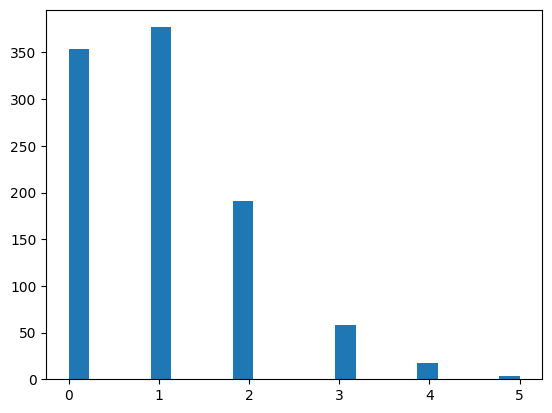

1.016


In [67]:
dpoiss = Poisson(1)
x = rand(dpoiss, 1000)
println(mean(x))
hist(x,22);

### The long tail of (some) gamma distributions.

[10, 4, 1, 2, 4, 1, 4, 3, 2, 5]
36
38

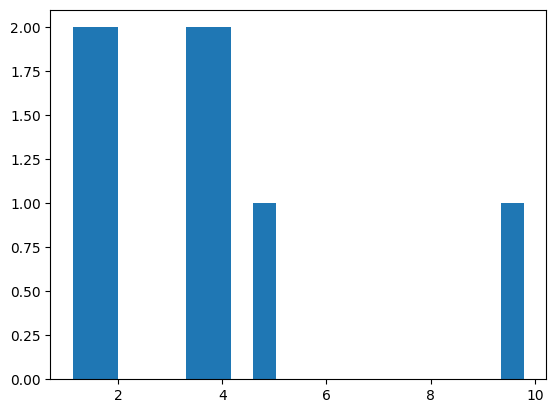

.0
48.0


In [13]:
dgamma = Gamma(1.2, 2)  #shape, scale
x = rand(dgamma,10);
println(round.(Int,x))
println(sum(round.(Int,x)))
hh = hist(x,20);
println(ceil(sum(hh[1] .* hh[2][2:end])))
println(mean(dgamma) * 20)

In [11]:
hh[1]

20-element Array{Float64,1}:
 2.0
 1.0
 0.0
 1.0
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0

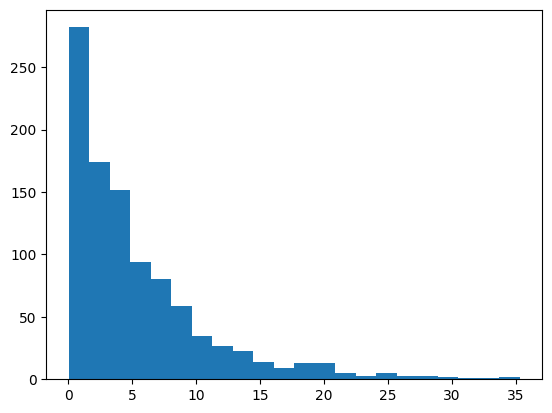

5.374664894554204


In [36]:
derlang = Erlang(1,5)  # integer shape, scale
x = rand(derlang,1000);
println(mean(x))
hist(x,22);

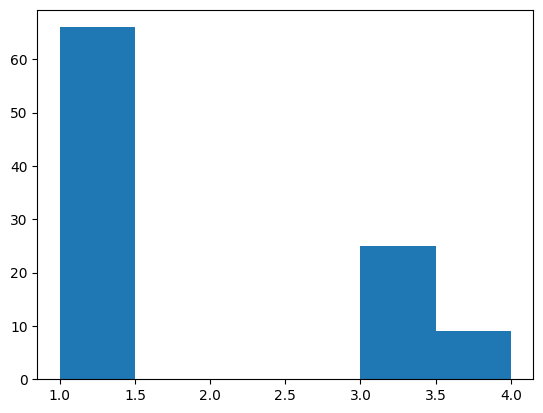

[66.0, 0.0, 0.0, 0.0, 25.0, 9.0]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [11]:
nilprobs = [.6, 0.0, .3, .1, 0.0, 0.0]

dcat = Categorical(nilprobs)
x = rand(dcat,100)
hh = hist(x,6);
println(hh[1])
println(hh[2])

[0.5, 0.0, 0.375, 0.125, 0.0, 0.0]


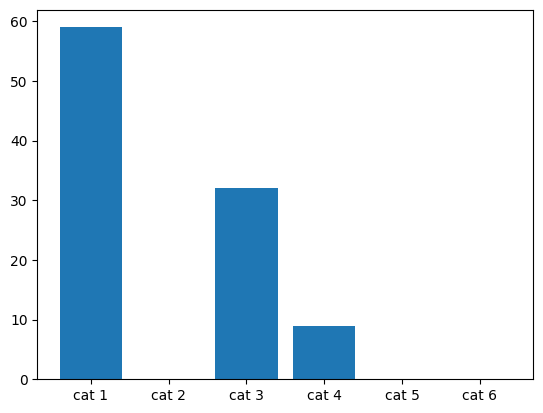

[3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 4, 3, 3, 1, 1, 1, 1, 1, 4, 3, 3, 4, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 4, 3, 1, 3, 4, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 4, 3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 4, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 4, 1, 3, 3, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1]
[59, 0, 32, 9, 0, 0]
[0.0 0.0 0.0 0.0 0.0 1.0; 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0; 0.0 0.0 1.0 0.0 0.0 0.0; 1.0 0.0 0.0 0.0 0.0 0.0; 1.0 0.0 0.0 0.0 0.0 0.0]
[0.0, 7.0, 14.0, 21.0, 28.0, 35.0, 42.0]


In [64]:
snorm(arr) = arr ./ (sum(arr))

age_amplify = Dict(1=>(1.3,.7), 2=>(1.1,.9), 3=>(1.0, 1.0), 4=>(0.9,1.1), 5=>(.8,1.2))
nilprobs = [.6, 0.0, .3, .1, 0.0, 0.0]
# do we amplify the probs or the outcomes?
# probs
nilprobs = snorm(nilprobs .* [0.8, 0.0, 1.2, 1.2, 0.0, 0.0])
# all this does is jiggle things in a way that doesn't have a lot of meaning--it changes the relative probs in 
# partially obvious way.  We need a reason that justifies the math.

probs = nilprobs
println(probs)

dcat = Categorical(probs)
x = rand(dcat,100)
vals = [count(x .== i) for i in 1:6]
names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
println(x)
println(vals)
bar(names, vals);

println(hh[1])
println(hh[2])

In [41]:
?xlim

search: xlim IndexLinear axvline axhline




    Get or set the x limits of the current axes.

    Call signatures::

        left, right = xlim()  # return the current xlim
        xlim((left, right))   # set the xlim to left, right
        xlim(left, right)     # set the xlim to left, right

    If you do not specify args, you can pass *left* or *right* as kwargs,
    i.e.::

        xlim(right=3)  # adjust the right leaving left unchanged
        xlim(left=1)  # adjust the left leaving right unchanged

    Setting limits turns autoscaling off for the x-axis.

    Returns
    -------
    left, right
        A tuple of the new x-axis limits.

    Notes
    -----
    Calling this function with no arguments (e.g. ``xlim()``) is the pyplot
    equivalent of calling `~.Axes.get_xlim` on the current axes.
    Calling this function with arguments is the pyplot equivalent of calling
    `~.Axes.set_xlim` on the current axes. All arguments are passed though.
    

### The preceding is the categorical distribution output with 3 classes (well, 6 with 3 having 0.0 probability) with 100 trials. Next, we will try with similar inputs using the multinomial probability distribution.

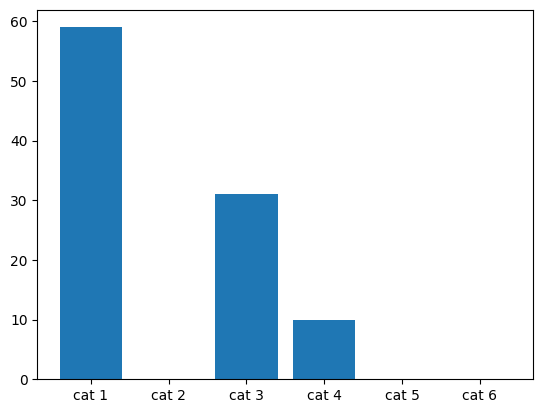

[59, 0, 31, 10, 0, 0]


In [65]:
# use the modified probs from the above to compare distribution plots
probs = [0.5, 0.0, 0.375, 0.125, 0.0, 0.0]
dmulti = Multinomial(100, probs)
names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
x = vec(rand(dmulti, 1))
println(x)
bar(names, x);
# xlim(0.0,6.0)

### Let's try this again with a simpler approach:

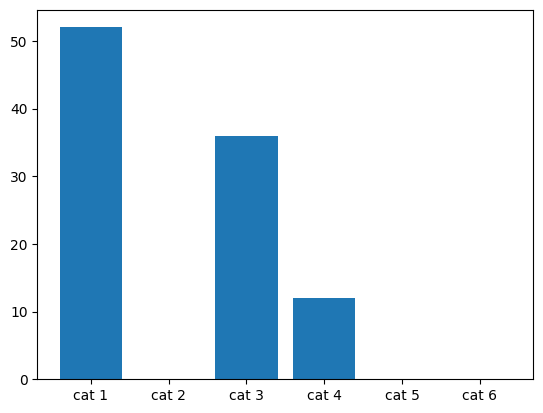

[0.0, 0.5, 0.5, 0.875, 1.0, 1.0, 1.0]
[52, 0, 36, 12, 0, 0]


In [22]:
probs = [0.5, 0.0, 0.375, 0.125, 0.0, 0.0]
cats = 6
boundaries = [0.0, probs[1], sum(probs[1:2]), sum(probs[1:3]), sum(probs[1:4]), sum(probs[1:5]), sum(probs[1:6])]
println(boundaries)
x = rand(100)
counts = [count(boundaries[i-1] .<= x .< boundaries[i]) for i in 2:7]
names = ("cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6")
println(counts)
bar(names, counts);

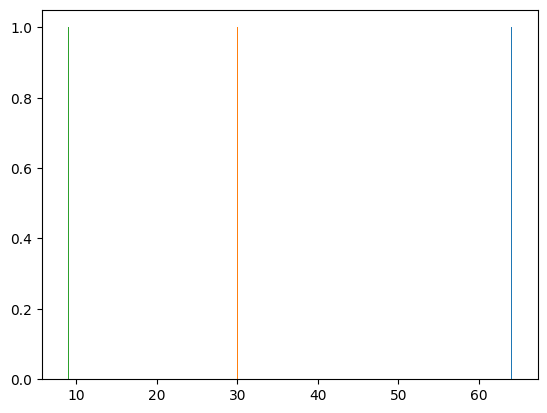

In [15]:
dbin1 = Binomial(100,0.6)
dbin3 = Binomial(100, 0.3)
dbin4 = Binomial(100, 0.1)
x1 = rand(dbin1, 1)
x3 = rand(dbin3, 1)
x4 = rand(dbin4, 1)
hist(x1);
hist(x3);
hist(x4);